# LSTM - word2vec sequence

- **Training set**: LO_SARD102 (0.75 split)
- **Test/Validation set:** LO_SARD102 (0.20 split)
- **Features**: word2vec sequence (100)
- **Class imbalance processing**: Undersampling

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
X_train = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_undersample_X_train.npy', mmap_mode='r')
Y_train = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_undersample_Y_train.npy', mmap_mode='r')

X_val = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_X_val.npy', mmap_mode='r')
Y_val = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_Y_val.npy', mmap_mode='r')

X_test =  numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_X_test.npy',  mmap_mode='r')
Y_test =  numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_Y_test.npy',  mmap_mode='r')

print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)
print(Y_test.shape)

In [2]:
train_gen = DataGenerator(_X=X_train, _y=Y_train, batch_size=2048)
val_gen =   DataGenerator(_X=X_val,   _y=Y_val,   batch_size=2048)
test_gen =  DataGenerator(_X=X_test,  _y=Y_test,  batch_size=2048)

## Build & train keras model

In [3]:
model = keras.Sequential()
model.add(layers.LSTM(64, input_shape=(100, 100), 
                      return_sequences=True))
model.add(layers.Dropout(0.1))
model.add( layers.TimeDistributed(layers.Dense(16)) )
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy']
             )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 64)           42240     
_________________________________________________________________
dropout (Dropout)            (None, 100, 64)           0         
_________________________________________________________________
time_distributed (TimeDistri (None, 100, 16)           1040      
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1601      
Total params: 44,881
Trainable params: 44,881
Non-trainable params: 0
_________________________________________________________________


In [4]:
history = model.fit_generator(train_gen,
                    epochs=16,
                    verbose=True,
                    validation_data=val_gen
                   )

Epoch 1/16
4/4 [==============================] - 11s 3s/step - loss: 0.6206 - accuracy: 0.5939 - val_loss: 0.6840 - val_accuracy: 0.5713
Epoch 2/16
4/4 [==============================] - 12s 3s/step - loss: 0.4617 - accuracy: 0.8272 - val_loss: 0.4345 - val_accuracy: 0.9349
Epoch 3/16
4/4 [==============================] - 11s 3s/step - loss: 0.3464 - accuracy: 0.8866 - val_loss: 0.2993 - val_accuracy: 0.9414
Epoch 4/16
4/4 [==============================] - 11s 3s/step - loss: 0.2617 - accuracy: 0.8964 - val_loss: 0.2186 - val_accuracy: 0.9362
Epoch 5/16
4/4 [==============================] - 11s 3s/step - loss: 0.2083 - accuracy: 0.9048 - val_loss: 0.1341 - val_accuracy: 0.9615
Epoch 6/16
4/4 [==============================] - 11s 3s/step - loss: 0.1678 - accuracy: 0.9312 - val_loss: 0.1315 - val_accuracy: 0.9602
Epoch 7/16
4/4 [==============================] - 11s 3s/step - loss: 0.1302 - accuracy: 0.9596 - val_loss: 0.1080 - val_accuracy: 0.9712
Epoch 8/16
4/4 [==================

## Evaluation

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     31916
         1.0       0.87      0.99      0.93      1299

    accuracy                           0.99     33215
   macro avg       0.93      0.99      0.96     33215
weighted avg       0.99      0.99      0.99     33215

Confusion matrix:
[[31722   194]
 [   11  1288]]

Confusion matrix (Percentages):
[[9.5505e+01 5.8400e-01]
 [3.3000e-02 3.8780e+00]]

Metrics:
Sensitivity (TPR): 0.991532
Specifity (TNR):   0.993922

FPR: 0.006078
FNR: 0.008468

Balanced accuracy: 0.992727

Test loss:	0.025439
Test accuracy:	0.993828


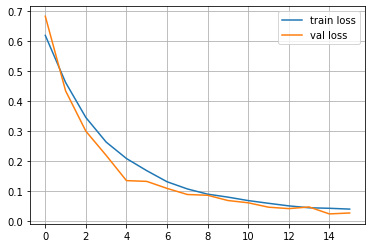

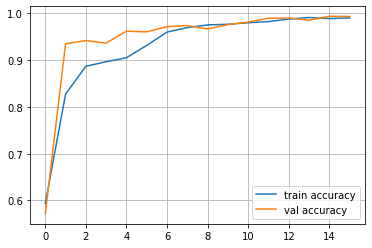

In [11]:
Y_pred = numpy.round(model.predict_generator(test_gen))

print(classification_report(Y_test, Y_pred))
print_metrics(confusion_matrix(Y_test, Y_pred), Y_test)
print()
score = model.evaluate_generator(test_gen, verbose=False)
print('Test loss:\t{:.6f}'.format(score[0]))
print('Test accuracy:\t{:.6f}'.format(score[1]))

plot_loss(history)
plot_accuracy(history)

## Discussion
...

In [12]:
model.save('LSTM_word2vec_undersample.h5')